In [210]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [211]:
data = pd.read_csv("spam.csv")

In [212]:
data


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [213]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis = 1,inplace = True)
data.rename(columns = {"v1": "label","v2":"message"},inplace = True)

In [214]:
data.head(3)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [215]:
data["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

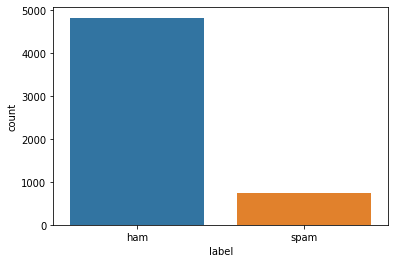

In [216]:
sns.countplot(x =  data["label"])

([<matplotlib.patches.Wedge at 0x24216b147f0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')])

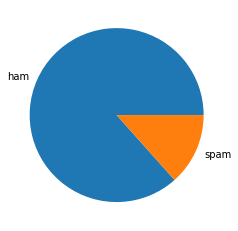

In [217]:
plt.figure()
plt.pie(data["label"].value_counts(),labels = ["ham","spam"])

In [218]:
#let's see few words occuring in spam messages
d_s =data[data["label"]=="spam"]
#to apply text mining methods we need to convert it into lists
l = d_s["message"].tolist()
l1 =(",").join(l)
l1 = l1.lower()


In [219]:
d_s

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


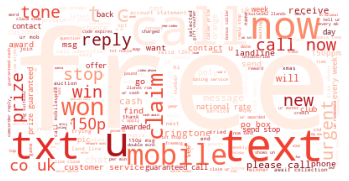

In [220]:
import os
from wordcloud import WordCloud
from PIL import Image
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(l1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

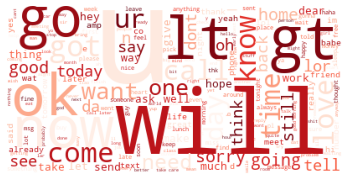

In [221]:
#let's see few words occuring in spam messages
d_s =data[data["label"]=="ham"]
#to apply text mining methods we need to convert it into lists
l = d_s["message"].tolist()
l1 =(",").join(l)
l1 = l1.lower()
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(l1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [222]:
import nltk

In [223]:
s_list = [x.split(" ")for x in l]
s_l = [x for n in s_list for x in n]


In [224]:
dist = nltk.FreqDist(s_l)
dist

FreqDist({'to': 1530, 'you': 1458, 'I': 1436, 'the': 1019, 'a': 969, 'and': 738, 'i': 736, 'in': 734, 'u': 645, 'is': 638, ...})

In [225]:
K= dist.keys()


In [226]:
#lets change label to numeruic
data["label"] = np.where(data["label"]=="spam",1,0)

In [227]:
data["label"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int32

In [228]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data["message"],data["label"],test_size = 0.3,random_state = 42)

In [229]:
x_train.shape

(3900,)

In [230]:
x_test.shape

(1672,)

In [231]:
y_train.value_counts(normalize = True)

0    0.864615
1    0.135385
Name: label, dtype: float64

In [232]:
y_test.value_counts(normalize = True)

0    0.869019
1    0.130981
Name: label, dtype: float64

In [233]:
#both have almost equal ratio of spam and ham 

In [234]:
xlst = x_train.tolist()
xtlst = x_test.tolist()
from sklearn import feature_extraction
vectorizer = feature_extraction.text.TfidfVectorizer(
input= xlst ,  # input is the actual text
lowercase=True,      # convert to lowercase before tokenizing
stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(xlst) #gives tf idf vector for x_train
features_test_transformed  = vectorizer.transform(xtlst) #gives tf idf vector for x_test

In [235]:
features_train_transformed

<3900x6904 sparse matrix of type '<class 'numpy.float64'>'
	with 30263 stored elements in Compressed Sparse Row format>

In [236]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(features_train_transformed,y_train)

MultinomialNB()

In [237]:
pre = clf.predict(features_test_transformed)
from sklearn.metrics import accuracy_score
accuracy_score(pre,y_test)

0.9677033492822966

In [238]:
print("classifier accuracy {:.2f}%".format(clf.score(features_test_transformed, y_test) * 100))

classifier accuracy 96.77%


In [239]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
results = confusion_matrix(y_test, pre)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(y_test, pre))
print ('Report :')
print (classification_report(y_test, pre) )
score_2 = f1_score(y_test, pre, average = 'binary')
print('F-Measure: %.3f'%score_2)


Confusion Matrix :
[[1453    0]
 [  54  165]]
Accuracy Score : 0.9677033492822966
Report :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672

F-Measure: 0.859
